In [1]:
%load_ext autoreload
%autoreload 2
import video_processing as vp
import librain as lb
import fnames
import matplotlib.pyplot as plt
import seed
import numpy

## Constants

In [2]:
HEIGHT = 256
WIDTH = 256
TRUE_FRAMERATE = 28.815

## File paths

In [4]:
path = "\\Users\\User\\Documents\\FEDCODE - Nick\\" # location of "date" folders 

direc = lb.Data(path)

# help(direc.experiment)

EXP_1 = direc.experiment("march 16 2018", exp_num=1)

# help(direc.file)

left_blue_frame_file = direc.file(
    exp_folder=EXP_1, fname="left blue"
)

# try: print(fnames.fnames.get("left blue")) to see an example of a file that would correspond to fname="left blue" in direc.file

right_blue_frame_file = direc.file(
    exp_folder=EXP_1, fname="right blue"
)

left_green_frame_file = direc.file(
    exp_folder=EXP_1, fname="left green"
)

right_green_frame_file = direc.file(
    exp_folder=EXP_1, fname="right green"
)

left_mouse_processed_file = direc.file(
    exp_folder=EXP_1, fname="left green 0.01-3.0Hz"
)
right_mouse_processed_file = direc.file(
    exp_folder=EXP_1, fname="right green 0.01-3.0Hz"
)

## Load single blue and green frames

In [4]:
l_mouse_blue = numpy.load(left_blue_frame_file)    
r_mouse_blue = numpy.load(right_blue_frame_file)   

l_mouse_green = numpy.load(left_green_frame_file)  
r_mouse_green = numpy.load(right_green_frame_file) 

## Load the array of frames

In [5]:
l_mouse_frames = vp.extract_RAW_frames(
    filename=left_mouse_processed_file,
    width=WIDTH, 
    height=HEIGHT,
    num_channels=1,
    dtype='float32'
)
# mask negative infinities with -1
l_mouse_frames[numpy.where(l_mouse_frames == -numpy.inf)] = -1

r_mouse_frames = vp.extract_RAW_frames(
    filename=right_mouse_processed_file,
    width=WIDTH, 
    height=HEIGHT,
    num_channels=1,
    dtype='float32'
)
# mask negative infinities with -1
r_mouse_frames[numpy.where(r_mouse_frames == -numpy.inf)] = -1

## Bregma Selection

In [6]:
%matplotlib qt
l_bregma = seed.Bregma(l_mouse_blue)

Bregma Location: Column 114 Row 127

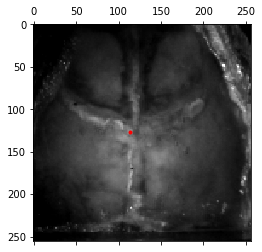

In [7]:
%matplotlib inline
l_bregma.show()

In [8]:
%matplotlib qt
r_bregma = seed.Bregma(r_mouse_blue)

Bregma Location: Column 117 Row 125

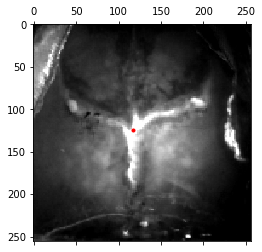

In [9]:
%matplotlib inline
r_bregma.show()

### Define parameters

In [10]:
start_interaction_frame = 2872
end_interaction_frame = 6930

# pixels per mm
l_ppmm = 30
r_ppmm = 30

### Produce adjusted (scaled) seed pixel objects

In [11]:
seeds = (
    ("M1", 1.03 + 1, 1.365),
    ("FL", 0.16, 2.47),
    ("HL", -0.7, 1.85),
    ("aBC", -1.36 + 0.575, 3.35),
    ("pBC", -1.9, 3.35),
    ("AC", 0 + 1, 0.6),
    ("RS", -2.8858 + 1, 0.62043),
    ("V1", -4.2678 + 0.8, 2.5168),
    ("mPTA", -2.4962, 2.2932),
    ("lPTA", -2.4962 - 0.3, 3.35 - 0.2),
    ("Un", -1.5, 2.6),
)

l_scaled_seeds = seed.generate_scaled_seeds(
    seeds=seeds, bregma=l_bregma, ppmm=l_ppmm, direction="u"
)

r_scaled_seeds = seed.generate_scaled_seeds(
    seeds=seeds, bregma=r_bregma, ppmm=r_ppmm, direction="u"
)


Direction chosen: u
Direction chosen: u


## Generate Correlation Matrix

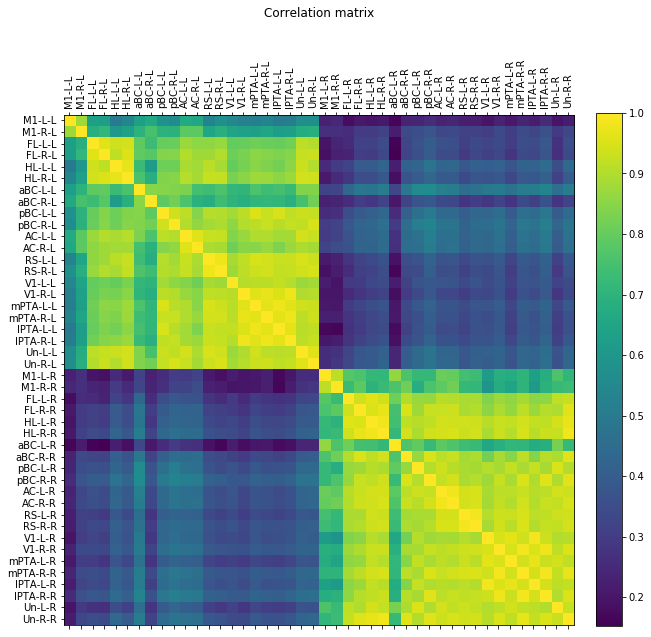

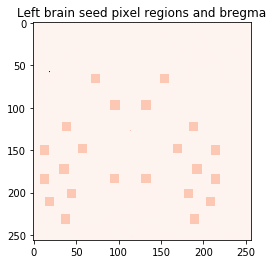

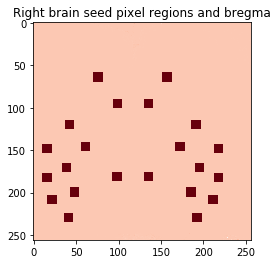

In [12]:
a = seed.generate_correlation_matrix(
    l_mouse_frames=l_mouse_frames[start_interaction_frame:end_interaction_frame], 
    r_mouse_frames=r_mouse_frames[start_interaction_frame:end_interaction_frame], # pass truncated frames
    l_seeds=l_scaled_seeds,
    r_seeds=r_scaled_seeds,
    title="Correlation matrix",
    filename="correlation_matrix",
    radius=5,
    interpolation="nearest",
    cmap="viridis",
    figsize=(10, 11)
)

## !Note: For the first right video frame from source has been edited out with blocks. As you can see above, there are two sets of squares for each seed pixel

## Save results

In [14]:
res = lb.Output(EXP_1)

# help(res.saveas)

figure = res.saveas(
    f_out=a[2],
    suffix="_TRUNCATED",
    ftype="svg",
    f_in=left_mouse_processed_file,
    save=True,
    fig=True,
)

matrix = res.saveas(
    f_out=a[1],
    suffix="_TRUNCATED",
    ftype="npy",
    f_in=left_mouse_processed_file,
    save=True,
)

Saved as LEFT_GREEN_processed__interp_dff0_bandpass001-120Hz_MM902L_March-16_1445_experiment-1_M903R_wt_cage-mates_together_12mm__TRUNCATED.svg
Saved as LEFT_GREEN_processed__interp_dff0_bandpass001-120Hz_MM902L_March-16_1445_experiment-1_M903R_wt_cage-mates_together_12mm__TRUNCATED.npy
